<a href="https://colab.research.google.com/github/MohdRad/ML_Course/blob/main/sklearn_Sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import os
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [20]:
df = pd.read_csv('tweets.csv')
# Define the input column and output column.
text_column = 'tweets'
label_column = 'Final_label'
df = df[[text_column, label_column]]
# Pick 1000 examples randomly
df = df.sample(n=1000, random_state=42)
# Show the samples
df

,tweets,Final_label
468,@LucaMilani79 @MikaelValterss1 to @BBCWorld @t...,Neutral
3219,RT @SantaSalvacion: @SimonMagus The fact that ...,Negative
538,RT @DowlatNowrouzi: Diplomacy will not deter t...,Negative
4691,@Miraalk77 Oh you're correct I checked on Goog...,Negative
6384,Aerial view of the city of Poliske located abo...,Negative
...,...,...
1626,RT @Greens4Nuclear: I don't see this as a reas...,Neutral
1219,Trump hid classified info including war plans ...,Negative
9518,"@PattyforGaPSC Sure, I remember it. You wrote ...",Negative
2238,The US secretary of state advanced a reset in ...,Positive


In [25]:
# Function for the pre-processing
def preprocess_text(text):
    # Conversion to the lowercase.
    text = text.lower()
    # Remove all the special characters.
    text = re.sub(r'[^\w\s]', '', text)
    # Tokenize
    tokens = word_tokenize(text)
    # Remove all the stop words (and, or, with)
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    # Stemmize and Lemmatize
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(token) for token in filtered_tokens]
    return ' '.join(stemmed_tokens)

# Preprocess the data
df[text_column]=df[text_column].apply(preprocess_text)
# Define input and output
X = df[text_column]
y = df[label_column]
# Vectorization
vectorizer = TfidfVectorizer()
X_vectorized = vectorizer.fit_transform(X)
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=10)

In [26]:
# Classifier model compile
def run_classifier(model):
    model.fit(X_train, y_train)
    # Prediction
    y_pred = model.predict(X_test)
    # Classification Accuarcy
    accuracy = accuracy_score(y_test, y_pred)
    # Classification Report
    classification_rep = classification_report(y_test, y_pred)
    # Confusion Matrix computation
    conf_matrix = confusion_matrix(y_test, y_pred)
    # List of the label
    class_names = model.classes_
    # Confusion Matrix visualization
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted label')
    plt.ylabel('Actual label')
    plt.title('Confusion Matrix')

    # Let us save the image file
    output_directory = 'Confusion_Matrix'
    output_filename = 'cm_RandomForest'
    output_path = os.path.join(output_directory,output_filename)
    if not os.path.exists(output_path):
        os.makedirs(output_path)
    plt.savefig(output_path)
    return accuracy, classification_rep



Random Forest Classifier
Accuracy: 0.62
Classification Report:
               precision    recall  f1-score   support

    Negative       0.61      0.99      0.76       120
     Neutral       1.00      0.04      0.08        23
    Positive       0.80      0.07      0.13        57

    accuracy                           0.62       200
   macro avg       0.80      0.37      0.32       200
weighted avg       0.71      0.62      0.50       200



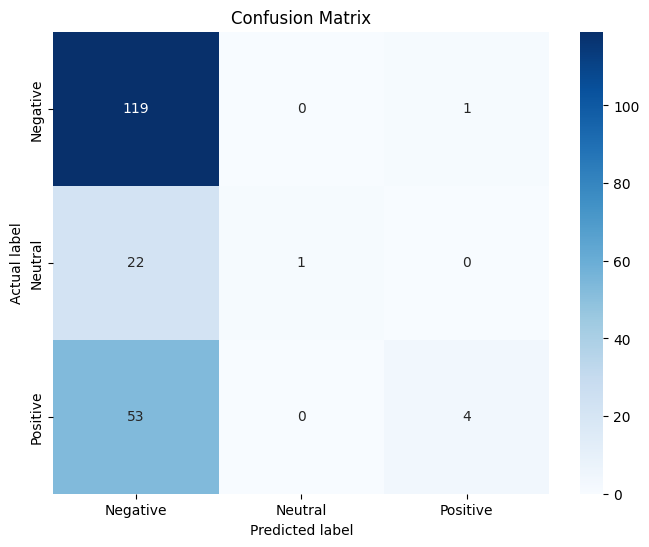

In [27]:
# Random Forest
rfc = RandomForestClassifier(n_estimators=100)
accuracy, classification_rep = run_classifier(rfc)
print("Random Forest Classifier")
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_rep)


Support Vector Classifier
Accuracy: 0.67
Classification Report:
               precision    recall  f1-score   support

    Negative       0.66      1.00      0.80       130
     Neutral       1.00      0.04      0.08        23
    Positive       1.00      0.04      0.08        47

    accuracy                           0.67       200
   macro avg       0.89      0.36      0.32       200
weighted avg       0.78      0.67      0.55       200



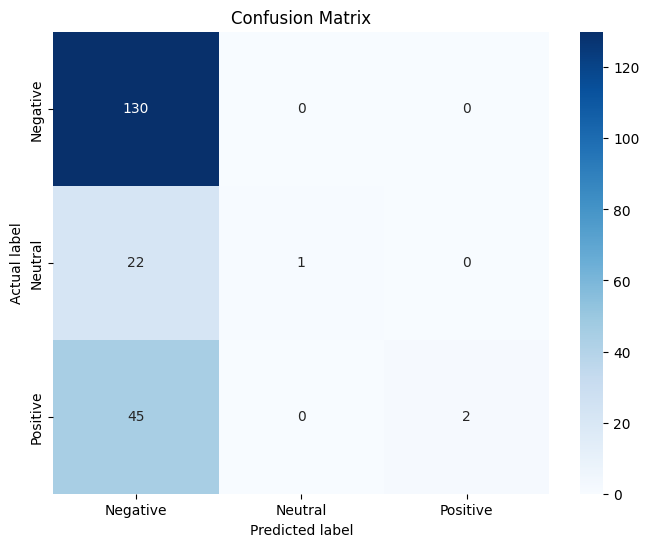

In [24]:
# Support Vector Classifier
svc = SVC()
accuracy, classification_rep = run_classifier(svc)
print("Support Vector Classifier")
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_rep)